In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
df = pd.read_csv('../data/rent_prices_long_imputed.csv')
df.loc[:, "Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d').dt.date

In [31]:
df.drop("Value", axis=1, inplace=True)
df = df.rename(columns={'Value_Imputed' : "Value"})

In [32]:
chinatown = df[df['areaName'] == 'Chinatown']
chinatown.shape

(191, 5)

In [33]:
chinatown.set_index('Date')

,areaName,Borough,areaType,Value
Date,,,,
2010-01-01,Chinatown,Manhattan,neighborhood,2900.0
2010-02-01,Chinatown,Manhattan,neighborhood,2900.0
2010-03-01,Chinatown,Manhattan,neighborhood,2550.0
2010-04-01,Chinatown,Manhattan,neighborhood,2200.0
2010-05-01,Chinatown,Manhattan,neighborhood,2200.0
...,...,...,...,...
2025-07-01,Chinatown,Manhattan,neighborhood,3800.0
2025-08-01,Chinatown,Manhattan,neighborhood,3550.0
2025-09-01,Chinatown,Manhattan,neighborhood,3800.0


<Axes: xlabel='Date', ylabel='Value'>

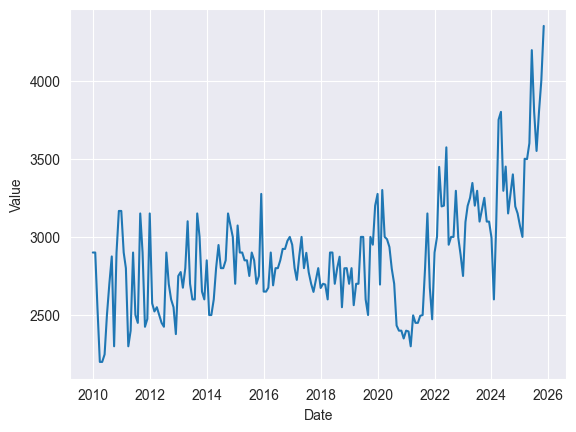

In [35]:
sns.lineplot(
    data=chinatown, x='Date', y='Value'
)

In [37]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(chinatown['Value'])

ADF Statistic: -0.14008911629073678
p-value: 0.9452961946418935
Non-Stationary


Data is non-stationary so a ARIMA or SARIMA model wouldn't make sense. Thus a Holt-Winters model will be used.